In [ ]:
# ───────────────────────────────────────────────────────────────────────────
# MILESTONE 2 – MODULE 3 : Tranning THE FILE WITH YOLOv8 AND RESULT ANALYSIS
# ───────────────────────────────────────────────────────────────────────────
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# ──────────────────────────────────────────────────────
#  1.Importing ultralytics pandas matplotlib seaborn
# ──────────────────────────────────────────────────────
!pip install ultralytics pandas matplotlib seaborn -q

In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from ultralytics import YOLO
from sklearn.metrics import classification_report

In [ ]:
# ────────────────────────────────────────────────
# 2. Configuration (paths)
# ────────────────────────────────────────────────
BASE_DIR = "/content/drive/MyDrive/PCB_DATASET/"
YOLO_YAML_PATH = os.path.join(BASE_DIR, "pcb_yolo_dataset.yaml")
MODEL_PATH = os.path.join(BASE_DIR, "best_yolov8_pcb.pt")
RUNS_DIR = os.path.join(BASE_DIR, "runs/pcb_yolo")  # folder where training saved results
class_names = [
    'missing_hole',
    'mouse_bite',
    'open_circuit',
    'short',
    'spur',
    'spurious_copper'
]

print("Model exists?", os.path.exists(MODEL_PATH))
print("Training results folder exists?", os.path.exists(RUNS_DIR))

Model exists? True
Training results folder exists? True


Model loaded successfully!

1. LEARNING CURVES (Train / Val Loss, Precision, Recall, mAP)
Columns in results.csv:
['epoch', 'time', 'train/box_loss', 'train/cls_loss', 'train/dfl_loss', 'metrics/precision(B)', 'metrics/recall(B)', 'metrics/mAP50(B)', 'metrics/mAP50-95(B)', 'val/box_loss', 'val/cls_loss', 'val/dfl_loss', 'lr/pg0', 'lr/pg1', 'lr/pg2', 'lr/pg3', 'lr/pg4', 'lr/pg5', 'lr/pg6', 'lr/pg7']


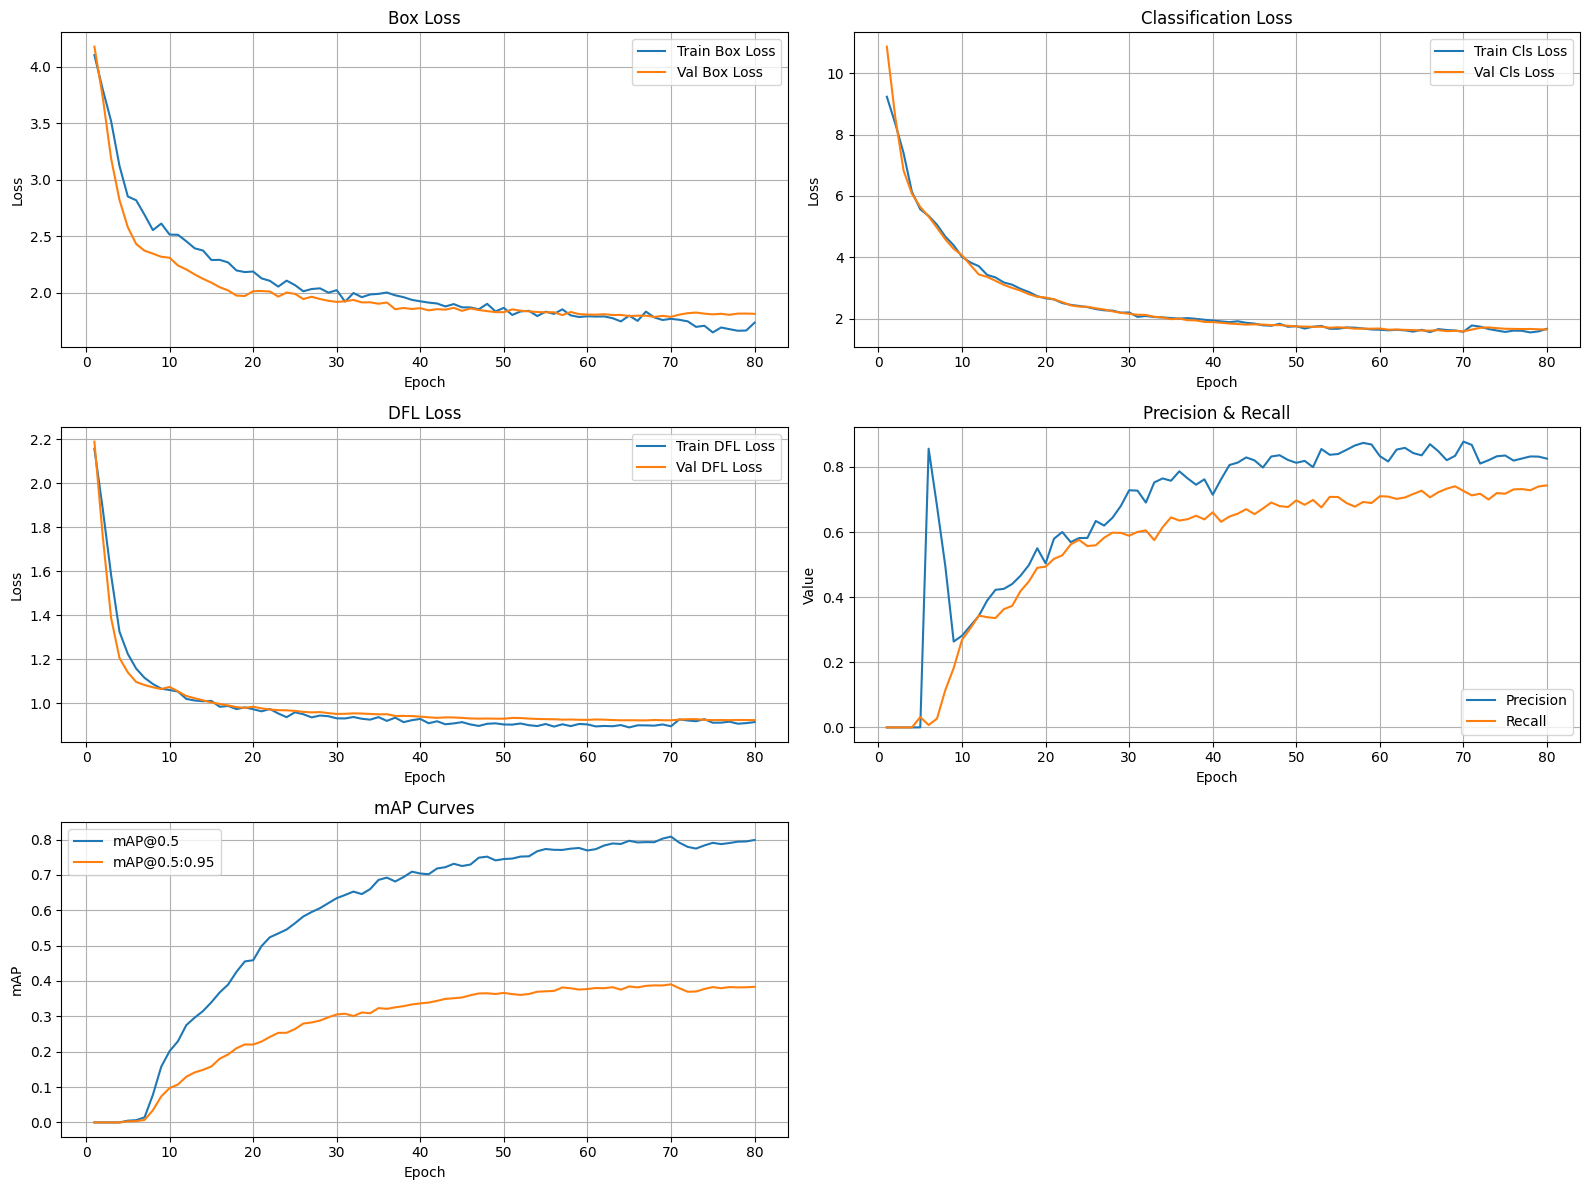

Learning curves saved to: /content/drive/MyDrive/PCB_DATASET/runs/pcb_yolo/learning_curves_all.png


<Figure size 640x480 with 0 Axes>

In [ ]:
# ────────────────────────────────────────────────
# 3. Load the trained model
# ────────────────────────────────────────────────
model = YOLO(MODEL_PATH)
print("Model loaded successfully!")

# ────────────────────────────────────────────────
# 4. LEARNING CURVES
# ────────────────────────────────────────────────
print("\n" + "="*80)
print("1. LEARNING CURVES (Train / Val Loss, Precision, Recall, mAP)")
print("="*80)

results_csv = os.path.join(RUNS_DIR, "results.csv")
if os.path.exists(results_csv):
    df = pd.read_csv(results_csv)
    df.columns = df.columns.str.strip()

    # Print columns to confirm
    print("Columns in results.csv:")
    print(list(df.columns))

    plt.figure(figsize=(16, 12))

    # Plot 1: Box Loss
    plt.subplot(3, 2, 1)
    plt.plot(df['epoch'], df['train/box_loss'], label='Train Box Loss')
    plt.plot(df['epoch'], df['val/box_loss'], label='Val Box Loss')
    plt.title('Box Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)

    # Plot 2: Classification Loss
    plt.subplot(3, 2, 2)
    plt.plot(df['epoch'], df['train/cls_loss'], label='Train Cls Loss')
    plt.plot(df['epoch'], df['val/cls_loss'], label='Val Cls Loss')
    plt.title('Classification Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)

    # Plot 3: DFL Loss
    plt.subplot(3, 2, 3)
    plt.plot(df['epoch'], df['train/dfl_loss'], label='Train DFL Loss')
    plt.plot(df['epoch'], df['val/dfl_loss'], label='Val DFL Loss')
    plt.title('DFL Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)

    # Plot 4: Precision & Recall
    plt.subplot(3, 2, 4)
    plt.plot(df['epoch'], df['metrics/precision(B)'], label='Precision')
    plt.plot(df['epoch'], df['metrics/recall(B)'], label='Recall')
    plt.title('Precision & Recall')
    plt.xlabel('Epoch')
    plt.ylabel('Value')
    plt.legend()
    plt.grid(True)

    # Plot 5: mAP@0.5 and mAP@0.5:0.95
    plt.subplot(3, 2, 5)
    plt.plot(df['epoch'], df['metrics/mAP50(B)'], label='mAP@0.5')
    plt.plot(df['epoch'], df['metrics/mAP50-95(B)'], label='mAP@0.5:0.95')
    plt.title('mAP Curves')
    plt.xlabel('Epoch')
    plt.ylabel('mAP')
    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    plt.show()

    # Save the figure
    curve_path = os.path.join(RUNS_DIR, "learning_curves_all.png")
    plt.savefig(curve_path)
    print(f"Learning curves saved to: {curve_path}")
else:
    print("results.csv not found in", RUNS_DIR)
    print("Cannot plot curves without training logs.")


2. CONFUSION MATRIX


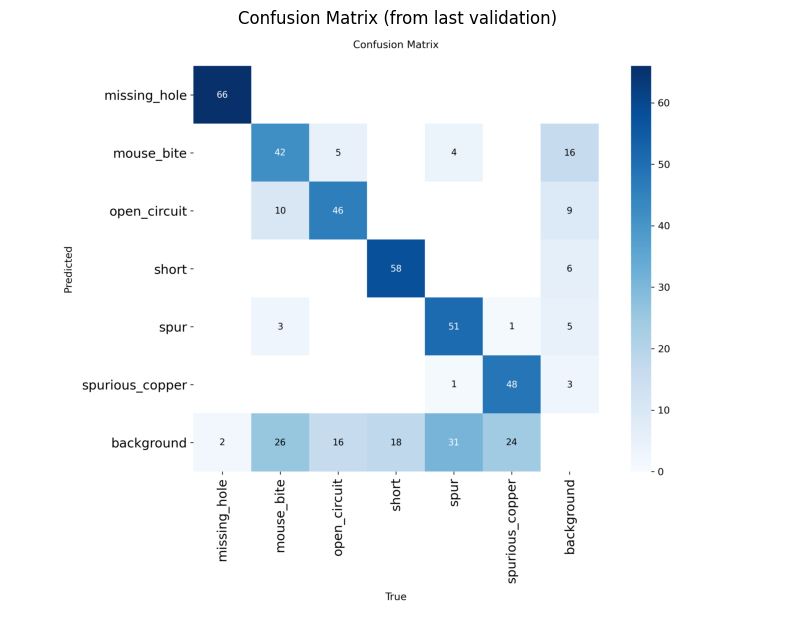

Confusion matrix displayed & saved at: /content/drive/MyDrive/PCB_DATASET/runs/pcb_yolo/confusion_matrix.png


In [ ]:
# ────────────────────────────────────────────────
# 2. CONFUSION MATRIX
# ────────────────────────────────────────────────
print("\n" + "="*80)
print("2. CONFUSION MATRIX")
print("="*80)

conf_matrix_path = os.path.join(RUNS_DIR, "confusion_matrix.png")
if os.path.exists(conf_matrix_path):
    img = Image.open(conf_matrix_path)
    plt.figure(figsize=(10, 8))
    plt.imshow(img)
    plt.axis('off')
    plt.title("Confusion Matrix (from last validation)")
    plt.show()
    print(f"Confusion matrix displayed & saved at: {conf_matrix_path}")
else:
    print("confusion_matrix.png not found.")
    print("Generating fresh confusion matrix via validation...")
    val_results = model.val(data=YOLO_YAML_PATH, split='val', plots=True, save=True, conf=0.25, iou=0.45)
    print("New confusion matrix saved in runs folder.")

In [ ]:
# Cell F: Test Set Evaluation (your original Cell 10 - this is the "test accuracy")
print("\n" + "="*60)
print("TEST SET EVALUATION (Final Test Accuracy)")
print("="*60)

test_metrics = model.val(data=YOLO_YAML_PATH, split='test', plots=True, save=True, conf=0.25, iou=0.45)

print("\nTest set metrics:")
print(f"Test mAP@0.5          : {test_metrics.box.map50:.4f}  ← Primary accuracy metric")
print(f"Test mAP@0.5:0.95     : {test_metrics.box.map:.4f}")
print(f"Test Precision (mean) : {np.mean(test_metrics.box.p):.4f}")
print(f"Test Recall (mean)    : {np.mean(test_metrics.box.r):.4f}")
print(f"Test F1-score (mean)  : {np.mean(test_metrics.box.f1):.4f}")


TEST SET EVALUATION (Final Test Accuracy)
Ultralytics 8.4.5 🚀 Python-3.12.12 torch-2.9.0+cpu CPU (Intel Xeon CPU @ 2.20GHz)
val: Fast image access ✅ (ping: 4.0±7.4 ms, read: 149.1±86.1 MB/s, size: 1338.9 KB)
val: Scanning /content/drive/MyDrive/PCB_DATASET/yolo_dataset/test/labels.cache... 104 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 104/104 17.4Mit/s 0.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 7/7 5.9s/it 41.6s
                   all        104        446      0.881      0.748      0.839      0.442
          missing_hole         15         59          1      0.983      0.991      0.622
            mouse_bite         25        112      0.861      0.607       0.74       0.34
          open_circuit         16         65      0.754      0.754      0.837      0.395
                 short         15         63      0.911       0.81      0.886      0.443
                  spur         19         83       0.87   

In [ ]:
# ──────────────────────────────────────────────────────────────────────────────
# MILESTONE 2 - MODULE 4: Inference – Testing 20 images per defect class
# ──────────────────────────────────────────────────────────────────────────────

print("\nRunning inference on 20 images per defect class from 'images' folder (MODULE 4)...")

model = YOLO(MODEL_PATH)  # Reuse the loaded model

# IMPORTANT: Use the correct folder with defected images
IMAGES_ROOT = os.path.join(BASE_DIR, "images")  # ← FIXED: points to images/ not PCB_USED

defect_classes = ['Missing_hole', 'Mouse_bite', 'Open_circuit', 'Short', 'Spur', 'Spurious_copper']

test_image_paths = []

for defect in defect_classes:
    folder = os.path.join(IMAGES_ROOT, defect)
    if os.path.exists(folder):
        # Get up to 20 images from this defect class folder
        files = [os.path.join(folder, f) for f in os.listdir(folder)
                 if f.lower().endswith(('.jpg', '.jpeg', '.png'))][:20]
        test_image_paths.extend(files)
        print(f"Added {len(files)} images from {defect}")
    else:
        print(f"Warning: Folder not found → {folder}")

print(f"\nTotal images selected for inference: {len(test_image_paths)}")

if not test_image_paths:
    print("No images found in any defect folder inside 'images/' → check folder structure")
else:
    total_tp = total_fp = total_fn = saved_count = 0

    for img_path in test_image_paths:
        filename = os.path.basename(img_path)
        results = model(img_path, conf=0.25, iou=0.45)
        detections = []

        for box in results[0].boxes:
            cls_id = int(box.cls)
            conf = float(box.conf)
            box_xyxy = box.xyxy[0].cpu().numpy().tolist()
            detections.append({'label': class_names[cls_id], 'box': box_xyxy, 'conf': conf})

        # Load image and visualize
        img = Image.open(img_path).convert("RGB")
        draw = ImageDraw.Draw(img)

        try:
            font = ImageFont.truetype("arialbd.ttf", 22)
        except:
            try:
                font = ImageFont.truetype("/usr/share/fonts/truetype/dejavu/DejaVuSans-Bold.ttf", 22)
            except:
                font = ImageFont.load_default()

        for det in detections:
            x1, y1, x2, y2 = map(int, det['box'])
            draw.rectangle((x1, y1, x2, y2), outline=(255, 0, 0), width=6)
            text = f"{det['label']} {det['conf']:.2f}"
            text_x = x1
            text_y = y1 - 32
            outline_offset = 3
            for dx, dy in [
                (-outline_offset, -outline_offset), (outline_offset, -outline_offset),
                (-outline_offset, outline_offset), (outline_offset, outline_offset),
                (-outline_offset, 0), (outline_offset, 0),
                (0, -outline_offset), (0, outline_offset)
            ]:
                draw.text((text_x + dx, text_y + dy), text, fill=(0, 0, 0), font=font)
            draw.text((text_x, text_y), text, fill=(255, 255, 255), font=font)

        # If no detection
        if not detections:
            draw.text((10, 10), "No defect detected", fill=(255, 0, 0), font=font)

        # Save visualized result
        save_path = os.path.join(OUTPUT_DIR, f"yolo_{filename}")
        img.save(save_path)
        saved_count += 1

        # Ground truth & metrics
        xml_path = None
        filename_no_ext = os.path.splitext(filename)[0]
        for defect in defect_classes:
            cand = os.path.join(ANNOTATIONS_DIR, defect, filename_no_ext + '.xml')
            if os.path.exists(cand):
                xml_path = cand
                break

        gt_boxes = []
        if xml_path:
            import xml.etree.ElementTree as ET
            tree = ET.parse(xml_path)
            for obj in tree.getroot().findall('object'):
                name = obj.find('name').text.strip().lower().replace(' ', '_').replace('-', '_')
                b = obj.find('bndbox')
                coords = [int(b.find(k).text) for k in ['xmin','ymin','xmax','ymax']]
                gt_boxes.append({'label': name, 'box': coords})

        pred_matched = [False] * len(detections)
        gt_matched = [False] * len(gt_boxes)

        def compute_iou(boxA, boxB):
            xA = max(boxA[0], boxB[0])
            yA = max(boxA[1], boxB[1])
            xB = min(boxA[2], boxB[2])
            yB = min(boxA[3], boxB[3])
            interArea = max(0, xB - xA) * max(0, yB - yA)
            boxAArea = (boxA[2] - boxA[0]) * (boxA[3] - boxA[1])
            boxBArea = (boxB[2] - boxB[0]) * (boxB[3] - boxB[1])
            iou = interArea / float(boxAArea + boxBArea - interArea + 1e-6)
            return iou

        for p_idx, p in enumerate(detections):
            p_label_norm = p['label']
            for g_idx, g in enumerate(gt_boxes):
                if p_label_norm == g['label'] and compute_iou(p['box'], g['box']) >= 0.5:
                    pred_matched[p_idx] = gt_matched[g_idx] = True

        tp = sum(pred_matched)
        fp = len(detections) - tp
        fn = len(gt_boxes) - sum(gt_matched)
        total_tp += tp
        total_fp += fp
        total_fn += fn

    print(f"\nProcessed {len(test_image_paths)} images (20 per defect class)")
    print(f"Saved {saved_count} visualized detection images to:")
    print(f"  {OUTPUT_DIR}")
    print(f"TP: {total_tp}   FP: {total_fp}   FN: {total_fn}")
    print(f"Precision: {total_tp / (total_tp + total_fp) if total_tp + total_fp > 0 else 0:.4f}")
    print(f"Recall:    {total_tp / (total_tp + total_fn) if total_tp + total_fn > 0 else 0:.4f}")

# Create dummy sync file
dummy = os.path.join(OUTPUT_DIR, "YOLO_SYNC.txt")
with open(dummy, 'w') as f:
    f.write("Inference done\n")
print(f"Dummy sync file created: {dummy}")


Running inference on 20 images per defect class from 'images' folder (MODULE 4)...
Added 20 images from Missing_hole
Added 20 images from Mouse_bite
Added 20 images from Open_circuit
Added 20 images from Short
Added 20 images from Spur
Added 20 images from Spurious_copper

Total images selected for inference: 120

image 1/1 /content/drive/MyDrive/PCB_DATASET/images/Missing_hole/11_missing_hole_10.jpg: 640x640 5 missing_holes, 258.8ms
Speed: 6.0ms preprocess, 258.8ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/drive/MyDrive/PCB_DATASET/images/Missing_hole/11_missing_hole_03.jpg: 640x640 5 missing_holes, 388.1ms
Speed: 9.4ms preprocess, 388.1ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/drive/MyDrive/PCB_DATASET/images/Missing_hole/12_missing_hole_01.jpg: 640x640 4 missing_holes, 385.9ms
Speed: 8.1ms preprocess, 385.9ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/d